# WHICH VARIABLES PREDICT HIGH CRIME RATE IN CITIES OF BOSTON
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.


Variables in order:

1. CRIM     per capita crime rate by town
1. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
1. INDUS    proportion of non-retail business acres per town
1. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
1. NOX      nitric oxides concentration (parts per 10 million)
1. RM       average number of rooms per dwelling
1. AGE      proportion of owner-occupied units built prior to 1940
1. DIS      weighted distances to five Boston employment centres
1. RAD      index of accessibility to radial highways
1. TAX      full-value property-tax rate per 10,000 USD
1. PTRATIO  pupil-teacher ratio by town
1. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. LSTAT    % lower status of the population
1. MEDV     Median value of owner-occupied homes in 1000's of USD

## Other things of note
* Data has been altered to include a column signifying to be a "low/high crime rate" town.
* A rating of high crime rate per capita has been defined as the top tercile of data

In [111]:
import os
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
numpy.set_printoptions(threshold=numpy.inf)


In [19]:
boston_data = genfromtxt("C:\\Users\\andro\\repositories\\dscipy_warmups\\fingerwarmup\\boston_data.csv", delimiter=',')

In [20]:
print(boston_data)

[[1.58760e-01 0.00000e+00 1.08100e+01 0.00000e+00 4.13000e-01 5.96100e+00
  1.75000e+01 5.28730e+00 4.00000e+00 3.05000e+02 1.92000e+01 3.76940e+02
  9.88000e+00 2.17000e+01]
 [1.03280e-01 2.50000e+01 5.13000e+00 0.00000e+00 4.53000e-01 5.92700e+00
  4.72000e+01 6.93200e+00 8.00000e+00 2.84000e+02 1.97000e+01 3.96900e+02
  9.22000e+00 1.96000e+01]
 [3.49400e-01 0.00000e+00 9.90000e+00 0.00000e+00 5.44000e-01 5.97200e+00
  7.67000e+01 3.10250e+00 4.00000e+00 3.04000e+02 1.84000e+01 3.96240e+02
  9.97000e+00 2.03000e+01]
 [2.73397e+00 0.00000e+00 1.95800e+01 0.00000e+00 8.71000e-01 5.59700e+00
  9.49000e+01 1.52570e+00 5.00000e+00 4.03000e+02 1.47000e+01 3.51850e+02
  2.14500e+01 1.54000e+01]
 [4.33700e-02 2.10000e+01 5.64000e+00 0.00000e+00 4.39000e-01 6.11500e+00
  6.30000e+01 6.81470e+00 4.00000e+00 2.43000e+02 1.68000e+01 3.93970e+02
  9.43000e+00 2.05000e+01]
 [8.37000e-02 4.50000e+01 3.44000e+00 0.00000e+00 4.37000e-01 7.18500e+00
  3.89000e+01 4.56670e+00 5.00000e+00 3.98000e+02 1

### Some distribution indicators of dataset

In [60]:
print(prediction_data.shape)

(404, 15)


C:\Users\andro\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


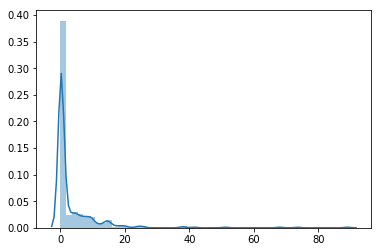

In [62]:
# distribution of the crime rate - first column
sns.distplot(prediction_data[:,0])


In [23]:
# Calculate upper tercile lower limit to classify "high crime" in a binary fashion
upper_tercile_limit = numpy.percentile(boston_data[0], 66)
print(upper_tercile_limit)

14.6902


In [79]:
numpy.amin(prediction_data[:,0])

0.00632

In [76]:
 numpy.amax(prediction_data[:,0])

88.9762

### We create the final to be modelled dataset here.

In [41]:
# Create array with length of original dataset and check you got it right
high_crime_array = numpy.zeros(shape=(boston_data.shape[0], 1))
print(high_crime_array.shape)

(404, 1)


In [43]:
# Append it to original array 
prediction_data = numpy.append(boston_data, high_crime_array, axis=1)


In [77]:
# populate array column 15 with "true/false" as int from comparison with aforementioned upper_tercile_limit
prediction_data[:,14] = (prediction_data[:,0] < 14.6902).astype(int)

In [96]:
print(prediction_data[:,14])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

### Actual logistic regression

In [89]:
# Predictors are the columns except for the first (detected crime rate) 
# and last (my "high / low" -column)
predictors = prediction_data[:,1:13]

In [91]:
# Predictors are the columns except for the first (detected crime rate) 
# and last (my "high / low" -column)
target_variable = prediction_data[:,14]

In [92]:
print(predictors.shape)

(404, 12)


In [98]:
print(target_variable)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [99]:
print(predictors)

[[0.00000e+00 1.08100e+01 0.00000e+00 4.13000e-01 5.96100e+00 1.75000e+01
  5.28730e+00 4.00000e+00 3.05000e+02 1.92000e+01 3.76940e+02 9.88000e+00]
 [2.50000e+01 5.13000e+00 0.00000e+00 4.53000e-01 5.92700e+00 4.72000e+01
  6.93200e+00 8.00000e+00 2.84000e+02 1.97000e+01 3.96900e+02 9.22000e+00]
 [0.00000e+00 9.90000e+00 0.00000e+00 5.44000e-01 5.97200e+00 7.67000e+01
  3.10250e+00 4.00000e+00 3.04000e+02 1.84000e+01 3.96240e+02 9.97000e+00]
 [0.00000e+00 1.95800e+01 0.00000e+00 8.71000e-01 5.59700e+00 9.49000e+01
  1.52570e+00 5.00000e+00 4.03000e+02 1.47000e+01 3.51850e+02 2.14500e+01]
 [2.10000e+01 5.64000e+00 0.00000e+00 4.39000e-01 6.11500e+00 6.30000e+01
  6.81470e+00 4.00000e+00 2.43000e+02 1.68000e+01 3.93970e+02 9.43000e+00]
 [4.50000e+01 3.44000e+00 0.00000e+00 4.37000e-01 7.18500e+00 3.89000e+01
  4.56670e+00 5.00000e+00 3.98000e+02 1.52000e+01 3.96900e+02 5.39000e+00]
 [2.20000e+01 5.86000e+00 0.00000e+00 4.31000e-01 6.71800e+00 1.75000e+01
  7.82650e+00 7.00000e+00 3.3000

In [102]:
# random permutation so we get training and target populations
perm = numpy.random.permutation(404)

In [104]:
# Eh, how does the selection work here?
predictors_train, predictors_test = predictors[perm][30:], predictors[perm][:30]
target_train, target_test = target_variable[perm][30:],target_variable[perm][:30]

In [108]:
predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape

((374, 12), (30, 12), (374,), (30,))

# ...and then what? ^^

from here on I have no idea what to do - I know what I want, that is creation of (and evaluation of the accuracy of) a model using the predictors to classify new input to high or low crime class

But have frankly no idea on how to do that.

# Example found in web
https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f

In [132]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [133]:
iris = load_iris()

In [134]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [135]:
type(iris)

sklearn.utils.Bunch

In [136]:
x = iris.data
y = iris.target

In [137]:
print(x.shape)

(150, 4)


In [138]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [139]:
non_versicolor_labels = [0 for i in range(100)]
versicolor_labels = [1 for i in range(50)]

In [140]:
# what is being done here?
y = numpy.concatenate([non_versicolor_labels, versicolor_labels])

In [117]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [141]:
perm_iris = numpy.random.permutation(150)

In [142]:
x_train, x_test = x[perm_iris][20:], x[perm_iris][:20]
y_train, y_test = y[perm_iris][20:], y[perm_iris][:20]

In [143]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((130, 4), (20, 4), (130,), (20,))

In [144]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [145]:
x_train = x_train[:,2:]
x_test = x_test[:,2:]

In [146]:
# what is this "versicolor" - reference here? Does not work.
plt.plot(x_train[versicolor][:,0], x_train[versicolor][:,1], 'b. ')
plt.plot(x_train[not_versicolor][:,0], x_train[not_versicolor][:,1], 'r. ')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend('Versicolor','Not Versicolor')
plt.show()

NameError: name 'versicolor' is not defined

In [147]:
def sigmoid(Z):
    return 1 / (1 + numpy.e**(-Z))

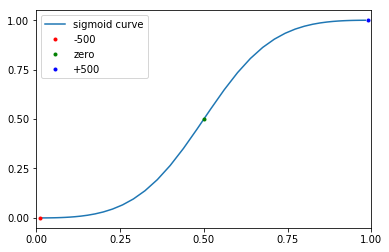

In [148]:
f, axes = plt.subplots(1,1)
plt.plot(sigmoid(numpy.linspace(-4, 4)), sigmoid(numpy.linspace(-10,10)))
plt.xlim(0,1)
axes.plot(0.01, sigmoid(-500),'r.')
axes.plot(0.5, sigmoid(0),'g.')
axes.plot(0.99, sigmoid(500), 'b.')
plt.xticks([0,0.25,0.50,0.75,1])
plt.yticks([0,0.25,0.50,0.75,1])
axes.legend(['sigmoid curve','-500','zero','+500'])


In [149]:
def logistic_loss(y, y_hat):
    return -numpy.mean(y * numpy.log(y_hat) + (1-y) * numpy.log(1-y_hat))


In [150]:
W = numpy.zeros((2,1))
b = numpy.zeros((1,1))
learning_rate = 0.01

In [151]:
m = len(y_train)

for epoch in range(5000):
    Z = numpy.matmul(x_train, W) + b
    A = sigmoid(Z)
    loss = logistic_loss(y_train, A)
    dz = A - y_train
    dw = 1/m * numpy.matmul(x_train.T, dz)
    db = numpy.sum(dz)
    
    W = W - learning_rate * dw
    b = b - learning_rate * db
    
    if epoch % 100 == 0:
        print(loss)
        


0.6931471805599453
0.43838437562910626
0.3624150652043967
0.3228381949837576
0.29725400963427345
0.2786461670464194
0.26412807916203307
0.2522779534142338
0.24230225200405986
0.2337158870512917
0.2262012393291396
0.21953896235982084
0.21357104851298228
0.2081797412007005
0.2032748095232746
0.1987855057881513
0.19465527960826468
0.19083818529818608
0.18729636840443434
0.1839982623783731
0.18091726592056165
0.17803075387613976
0.1753193247667319
0.17276621955033097
0.17035686649168824
0.1680785204039533
0.16591997353229998
0.16387132153696
0.16192377235692468
0.16006948880681987
0.15830145797366543
0.15661338209856493
0.15499958682621898
0.15345494360218268
0.1519748036768454
0.15055494169434613
0.1491915072453864
0.14788098307490585
0.1466201488804682
0.14540604983087618
0.14423596908878486
0.14310740374476683
0.14201804367007556
0.1409657528763411
0.1399485530365345
0.13896460887576267
0.13801221518516862
0.13708978524924478
0.13619584050768677
0.13532900129866243


In [152]:
W, b

(array([[2.66188087],
        [1.8760668 ]]), array([[-16.19453455]]))

In [154]:
preds = []
for i in sigmoid(Z):
    if i > 0.5:
        preds.append(1)
    else:
        preds.append(0)
        

In [155]:
from sklearn.metrics import f1_score

In [156]:
f1_score(preds, y_train)

0.9438202247191012

(-1, 3)

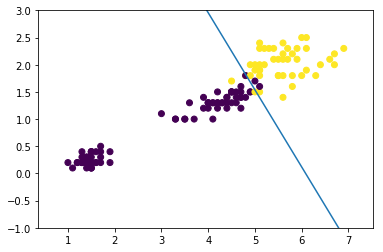

In [157]:
plt.scatter(x_train[:, 0], x_train[:,1], c = y_train.ravel())
ax = plt.gca()
xvals = numpy.array(ax.get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b) / W[1][0]
plt.plot(xvals, yvals)
plt.ylim(-1,3)

In [158]:
test_preds = []
for i in sigmoid(Z):
    if i > 0.5:
        test_preds.append(1)
    if i < 0.5:
        test_preds.append(0)
        

In [160]:
print(test_preds)

[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]


In [161]:
print(*y_test)

[0] [0] [0] [1] [1] [0] [0] [0] [1] [0] [0] [0] [0] [1] [0] [0] [0] [0] [1] [0]


(-1, 3)

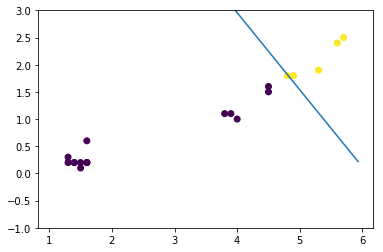

In [162]:
plt.scatter(x_test[:, 0], x_test[:, 1], c = y_test.ravel())
ax = plt.gca()
xvals = numpy.array(ax.get_xlim()).reshape(-1,1)
yvals = -(xvals * W[0][0] + b) / W[1][0]
plt.plot(xvals, yvals)
plt.ylim(-1, 3)